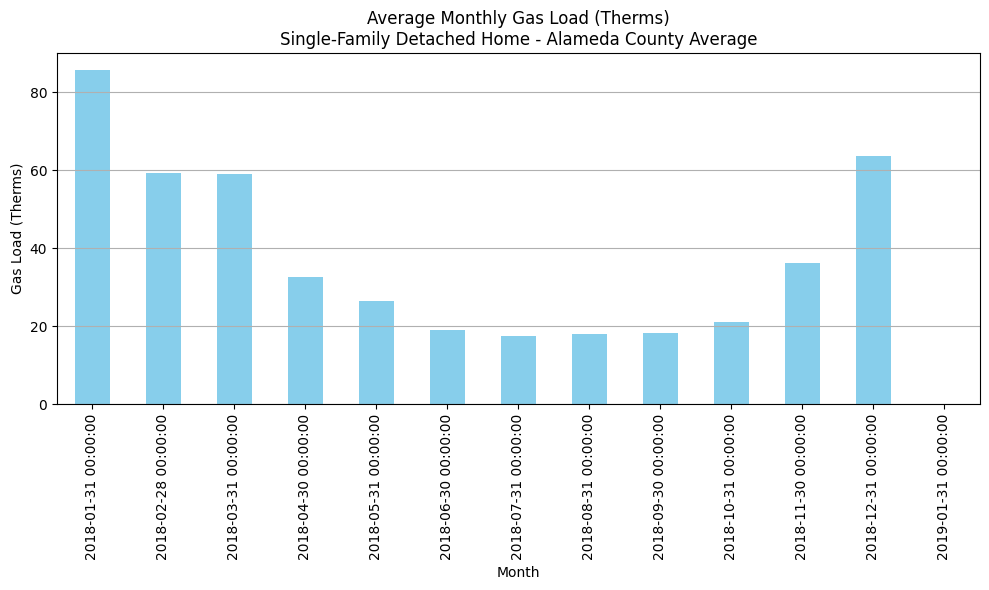

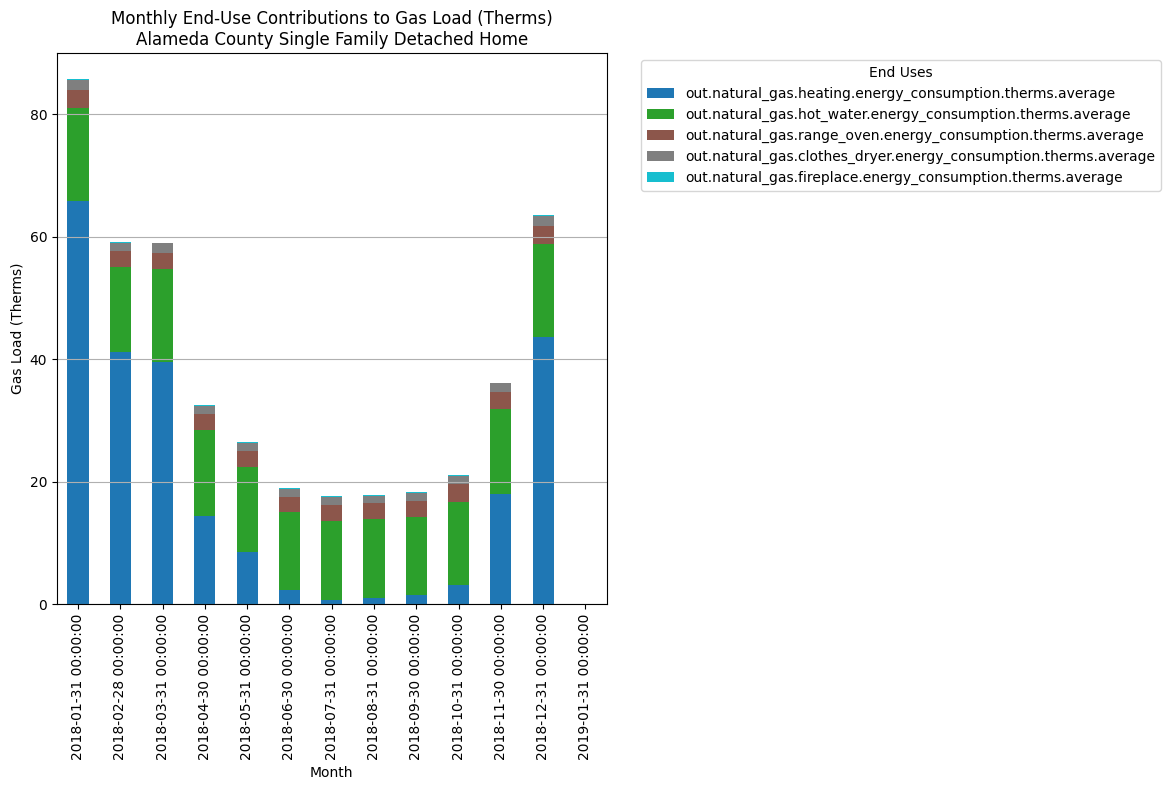

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base directory for the processed load profiles
BASE_OUTPUT_DIR = "data"

def plot_average_monthly_gas_load(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    # Load the data
    gas_data = pd.read_csv(file_path, parse_dates=['timestamp'])

    # Resample data to monthly totals for the average home
    monthly_avg_gas = gas_data.resample('M', on='timestamp')['average_load_therms'].sum()

    # Plot the average monthly gas load
    plt.figure(figsize=(10, 6))
    monthly_avg_gas.plot(kind='bar', color='skyblue')
    plt.title("Average Monthly Gas Load (Therms)\nSingle-Family Detached Home - Alameda County Average")
    plt.xlabel("Month")
    plt.ylabel("Gas Load (Therms)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


def plot_end_use_contributions(file_path, end_uses):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    gas_data = pd.read_csv(file_path, parse_dates=['timestamp'])

    monthly_end_uses = gas_data.resample('M', on='timestamp')[
        [f"{end_use}.therms.average" for end_use in end_uses]
    ].sum()

    monthly_end_uses.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 8),
        colormap="tab10",
    )
    plt.title("Monthly End-Use Contributions to Gas Load (Therms)\nAlameda County Single Family Detached Home")
    plt.xlabel("Month")
    plt.ylabel("Gas Load (Therms)")
    plt.legend(title="End Uses", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


# Example usage:
file_path = "county_gas_totals_with_averages.csv"

# Plot the average monthly gas load
plot_average_monthly_gas_load(file_path)

# List of end uses in the dataset
end_uses = [
    "out.natural_gas.heating.energy_consumption",
    "out.natural_gas.hot_water.energy_consumption",
    "out.natural_gas.range_oven.energy_consumption",
    "out.natural_gas.clothes_dryer.energy_consumption",
    "out.natural_gas.fireplace.energy_consumption",
]

# Plot the contributions of each end use
plot_end_use_contributions(file_path, end_uses)